In [12]:
from IPython.display import display
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
%matplotlib inline
font_name = font_manager.FontProperties(fname="C://Windows//Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

###  분류용 선형 모델
#### 이진 분류(Binary classification)
$\hat{y} = w_0 \times x_0+w_1 \times x_1+...+w_p \times x_p+b > 0 $
- 선형 회귀와 비슷하지만 예측한 값을 0과 비교하는 것이 다름
- 0 보다 작으면 클래스를 -1이라고 봄
- 0 보다 크면 클래스를 +1이라고 봄
- 이 규칙은 분류에 쓰이는 모든 선형모델에서 동일

---

- 보통 로지스틱 회귀는 선형 함수에 시그모이드 함수가 적용된 것으로 표현
- 분류의 기준이 되는 시그모이드 함수의 결괏값은 0.5로 선형 함수가 0일 기준과 같다고 봄
- scikit-learn에서 로지스틱 회귀의 predict 메서드는 
- 선형 함수 값을 계산해주는 decision_function 메서드를 사용해 0을 기준으로 예측
- 시그모이드 함수를 적용한 확률 값은 predict_proba 메서드에서 제공

---

- 회귀용 선형 모델에서는 출력 **$\hat{y}$**가 특성의 선형 함수
- 분류용 선형 모델에서는 **결정 경계**가 입력의 선형함수
- 다른 말로 하면 (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기

---

#### 선형 모델을 학습시키는 알고리즘
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

---

#### 로지스틱 회귀(Logistic regression)
- linear_model.LogisticRegression에 구현된 알고리즘
- 이진 분류에서는 **로지스틱(logistic) 손실 함수**를 사용
- 다중 분류에서는 **교차 에트로피(cross-entropy) 손실 함수** 사용
- 이름에 Regression(회귀)가 들어가지만 회귀 알고리즘이 아니고 **분류 알고리즘**
- 회귀 알고리즘은 **LinearRegression**


#### 서포트 벡터 머신(support vector machine)
- svm.LinearSVC에 구현도니 알고리즘
- 제곱 힌지(squared hinge) 손실 함수 사용


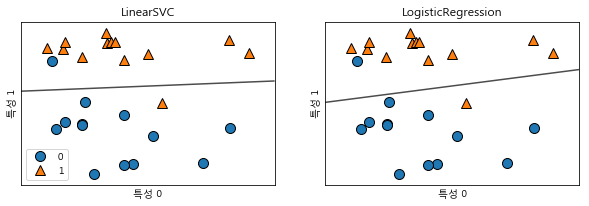

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

- forge 데이터셋의 첫 번째 특성을 x 축에 넣고 두 번째 특성을 y 축에 놓음
- 둘 다 결정 경계가 직선으로 표현되었고 위쪽은 클래스 1, 아래쪽은 클래스 0으로 나눔
- 회귀에서 본 Ridge와 마찬가지로 두 모델은 기본적으로 L2 규제를 사용


- 규제의 상도를 결정하는 매개변수는 C
- C의 값이 높아지면 규제가 감소
- 높은 C 값을 지정하면 훈련 세트에 가능한 최대로 맞춤
- 반면 낮은 C 값은 계수 벡터($w$)가 0에 가까워지도록 됨

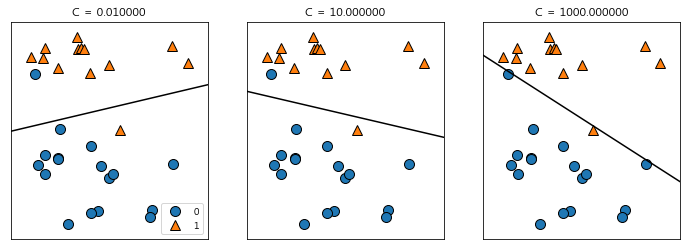

In [3]:
mglearn.plots.plot_linear_svc_regularization()

- 왼쪽은 아주 작은 C 값 때문에 규제가 많이 적용 됨
- 규제가 강해진 모델은 비교적 수평에 가까운 결정 경계를 만듦
- 중간 그림은 C ㄱㅄ이 조금 더 크면 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어짐
- C 값을 크게 하면 오른쪽처럼 결정 경계는 더 길울어 짐
- 훈련 데이터를정확하게 분류하려고 애썼지만 과대 적합

- 회귀와 비슷하게 낮은 차원의 데이터에서는 결정 경계가 매우 제한적
- 고차원에서는 분류에 대한 선형 모델이 강력해짐
- 특성이 많아지면 과대적합되지 않게 주의

In [14]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


- 유방암 데이터셋을 사용해 Logistic Regression
- C =1이 훈련 세트와 테스트 세트 양쪽에 95% 정확도로 꽤 훌륭한 성능
- 하지만 훈련 세트와 테스트 세트의 성넝이 매우 비슷(과소 적합)

---

### 모델의 제약을 더 풀어주기 위해 C를 증가

In [17]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


- C = 100을 사용하니 훈련 세트의 정확도가 높아짐
- 복잡도가 높은 모델일수록 성능이 좋아짐을 말해줌

---

### 규제를 더 강하게 진행(C=0.01)

In [18]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


- 예상대로 이미 과소적합(C=1)의 왼쪽으로 더 이동하게 되므로 
- 훈련 세트와 테스트 세트의 정확도는 더 낮아짐

---

### 규제 매개변수 C 설정을 세 가지로 다르게 학습시킨 모델의 계수

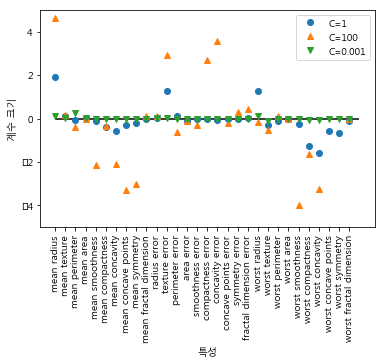

In [20]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

- 기본적으로 L2 규제를 적용하므로 Ridge로 만든 모습과 비슷
- 규제를 강하게 할수록 계수들을 0에 더 가깝게 만들지만 완전히 0이 되지는 않음

- 자세히 보면 세 번째 계수에서 재미 있는 현상을 확인할 수 있음
- C=100, C=1일 때 이 계수는 음수지만
- C=0.001일 때는 양수가 됨
- 이와 같은 모델을 해석하면 계수가 클래스와 특성의 연관성을 알려줌
- 선형 모델의 계수는 항상 의심하고 조심해서 해석해야 함

---

### L1 규제를 사용할 때의 ㅣ분류 정확도와 계수 그래프

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.913146
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.923077
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.960094
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.958042
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.985915
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.979021


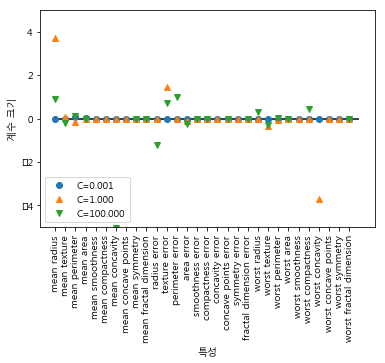

In [23]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
      

In [ ]:
- 회귀에서 처럼 L1은 일부 특성만 사용
- L2는 전체 특성을 모두 이용